# Vectorizers

In this notebook we will create and test several vectorizers.
This will use the Vectorizer class from Subreddit_Predictions_2.piynb
The class documentation will be below.

No training needed
[ 8 10  7 ... 10  2  9]


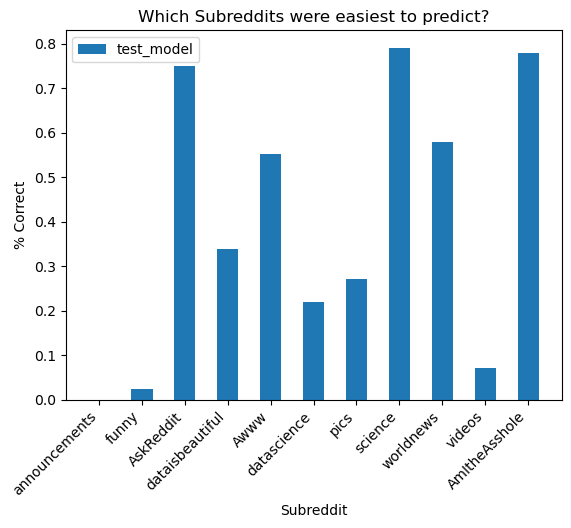

[2 2 2 2 2 2 2]


In [9]:
%run Subreddit_Predictions_2.ipynb

# Class: Vectorizer

Objects of this class are vectorizers, like Bag-of-Words or Doc2Vec. They have very few attributes and methods.
All of the attributes and methods will be overwritten by each object of this class.

**Attributes:**

| Name           | Type | Description                                                                                         |
|----------------|------|-----------------------------------------------------------------------------------------------------|
| vectorizerName | str | The name of this vectorizer. <br/> This will be the key for any dictionaries containing it.         |
| description    | str | A breif discription of what this vectorizer is/does. <br/>Put the parameters here if there are any. |
| model | Other | The actual model. Typically an object of a class like Gensim or SCM

**Methods:**

| Name                                  | Description                                                                                          |
|---------------------------------------|------------------------------------------------------------------------------------------------------|
| train(X_train: DataFrame)             | Uses the training data to train the model.                                                           |
| embed(titles: DataFrame) -> DataFrame | Takes a list/dataFrame of titles and returns a DataFrame of the embeddings for each of them. |



## Vectorizer Testor

Since I will probably be creating several vectorizers, it will help me if I have a function to quickly test them.

### Bag-of-Words

In [0]:
BoW = Vectorizer('BoW')
BoW.description = "Naive Bag-of-Words embedding"

from sklearn.feature_extraction.text import CountVectorizer

def _BoW_train(X_train):

    model = CountVectorizer()
    model.fit_transform(X_train)
    return model

def _BoW_embed(titles, model):
    embedding = model.transform(titles).toarray()



In [60]:

Embedding[featureName] = CountVectorizer()
Features[featureName] = Embedding[featureName].fit_transform(X_train)

Features['BoW']
Embedding['BoW'].transform(X_train).toarray()

NameError: name 'Embedding' is not defined